In [63]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import pingouin as pg
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu, norm
from matplotlib.ticker import FuncFormatter
from statannotations.Annotator import Annotator
from scipy.stats import rankdata

In [64]:
df3 = pd.read_csv('source/FReDA3.csv')
df4 = pd.read_csv('source/FReDA4.csv')

Text(0.5, 0, 'Satisfied = Frequency is the same as Wish\nDeprived = Wish is greater than Frequency\nSaturated = Frequency is greater than Wish')

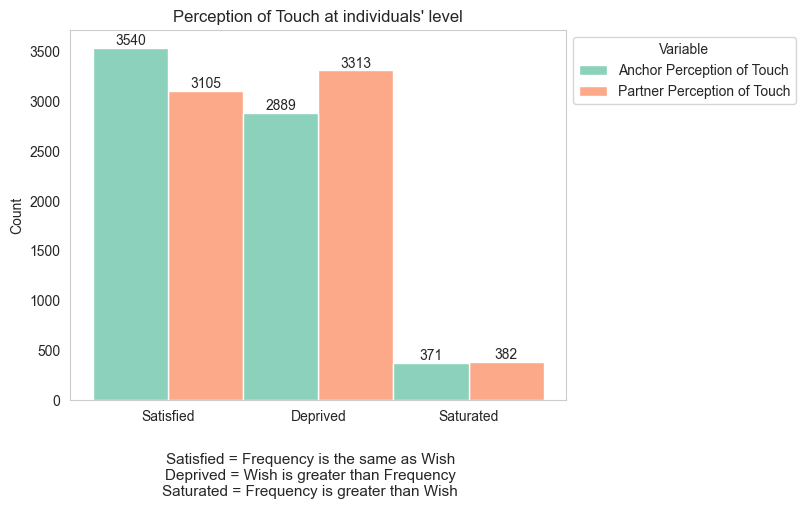

In [65]:
df2 = df3.melt(
    value_vars=["Anchor Perception of Touch", "Partner Perception of Touch"],
    var_name="Variable",
    value_name="Value"
)
ax = sns.histplot(
    data=df2,
    x="Value",
    hue="Variable",
    bins=15,
    multiple="dodge",
    palette=sns.color_palette("Set2", 2),
)

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height,
        int(height),
        ha="center", va="bottom"
    )
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.grid(False)
plt.xlabel("")
plt.title("Perception of Touch at individuals' level")
plt.suptitle("Satisfied = Frequency is the same as Wish"
             "\nDeprived = Wish is greater than Frequency"
             "\nSaturated = Frequency is greater than Wish",
             fontsize=11,
             y=-0
             )
# plt.savefig('output/img/groups/new_histo_couple_members.png', dpi=600, transparent=False, bbox_inches='tight')

In [66]:
couples_agreement = df4[df4["Group2"] == "Couple Agreement"].copy()
couples_deprived = df4[df4["Group2"].isin(["Couple Deprivation", "One-sided Deprivation"])].copy()
couples_saturated = df4[df4["Group2"].isin(["Couple Saturation", "One-sided Saturation"])].copy()
couples_mixed = df4[df4["Group2"] == "Couple Disagreement"].copy()

In [67]:
from scipy.stats import mannwhitneyu

# Sample data for group 1 and group 2
sample1 = couples_agreement["Frequency of Touch"]
sample2 = couples_deprived["Frequency of Touch"]
sample3 = couples_saturated["Frequency of Touch"]
sample4 = couples_mixed["Frequency of Touch"]

# 'alternative' can be 'two-sided', 'less', or 'greater'
# stat, p_value = mannwhitneyu(sample1, sample3, alternative='two-sided')
stat, p_value = mannwhitneyu(sample1, sample4, alternative='less')

print(f"U-statistic: {stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: X is greater than Y")
    # print("Reject the null hypothesis: There is a significant difference between the two samples.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two samples.")

U-statistic: 1827216.5
P-value: 1.0
Fail to reject the null hypothesis: There is no significant difference between the two samples.


In [90]:
# target_df = couples_agreement
# target_df = couples_deprived
# target_df = couples_saturated
target_df = couples_mixed

c1 = target_df[(target_df["Sex"] == 1) & (target_df["Married"] == 0)].copy()
c2 = target_df[(target_df["Sex"] == 1) & (target_df["Married"] >= 1)].copy()
#
# c1 = target_df[(target_df["Sex"] == 0)].copy()
# c2 = target_df[(target_df["Sex"] == 1)].copy()

sample1 = c1["Frequency of Touch"]
sample2 = c2["Frequency of Touch"]
sample3 = c1["Wish for Touch"]
sample4 = c2["Wish for Touch"]

alpha = 0.05
print("-------------------- Frequency of touch -------------------- ")
stat, p_value = mannwhitneyu(sample1, sample2, alternative='two-sided')
print(f"U-statistic: {stat}")
print(f"P-value: {p_value}")
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the two samples.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two samples.")

stat, p_value = mannwhitneyu(sample1, sample2, alternative='less')
print(f"U-statistic: {stat}")
print(f"P-value: {p_value}")
if p_value < alpha:
    print("Reject the null hypothesis: Y is greater than X.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two samples.")

stat, p_value = mannwhitneyu(sample1, sample2, alternative='greater')
print(f"U-statistic: {stat}")
print(f"P-value: {p_value}")
if p_value < alpha:
    print("Reject the null hypothesis: X is greater than Y.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two samples.")

print("-------------------- Wish of touch -------------------- ")
stat, p_value = mannwhitneyu(sample3, sample4, alternative='two-sided')
print(f"U-statistic: {stat}")
print(f"P-value: {p_value}")
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the two samples.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two samples.")

stat, p_value = mannwhitneyu(sample3, sample4, alternative='less')
print(f"U-statistic: {stat}")
print(f"P-value: {p_value}")
if p_value < alpha:
    print("Reject the null hypothesis: Y is greater than X.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two samples.")

stat, p_value = mannwhitneyu(sample3, sample4, alternative='greater')
print(f"U-statistic: {stat}")
print(f"P-value: {p_value}")
if p_value < alpha:
    print("Reject the null hypothesis: X is greater than Y.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two samples.")

-------------------- Frequency of touch -------------------- 
U-statistic: 15101.5
P-value: 0.0013456854428119435
Reject the null hypothesis: There is a significant difference between the two samples.
U-statistic: 15101.5
P-value: 0.9993299935674861
Fail to reject the null hypothesis: There is no significant difference between the two samples.
U-statistic: 15101.5
P-value: 0.0006728427214059717
Reject the null hypothesis: X is greater than Y.
-------------------- Wish of touch -------------------- 
U-statistic: 15949.0
P-value: 2.2872582351647106e-05
Reject the null hypothesis: There is a significant difference between the two samples.
U-statistic: 15949.0
P-value: 0.99998862538168
Fail to reject the null hypothesis: There is no significant difference between the two samples.
U-statistic: 15949.0
P-value: 1.1436291175823553e-05
Reject the null hypothesis: X is greater than Y.
